#Importing Necessary Libraries and Data

In [1]:
!pip install lazypredict

     |████████████████████████████████| 10.1 MB 5.1 MB/s 
     |████████████████████████████████| 1.2 MB 53.7 MB/s 
     |████████████████████████████████| 25.9 MB 1.5 MB/s 
     |████████████████████████████████| 6.8 MB 33.1 MB/s 
     |████████████████████████████████| 248 kB 57.8 MB/s 
     |████████████████████████████████| 302 kB 54.2 MB/s 
     |████████████████████████████████| 127.6 MB 18 kB/s 
     |████████████████████████████████| 14.5 MB 40.6 MB/s 
     |████████████████████████████████| 72 kB 848 kB/s 
     |████████████████████████████████| 269 kB 17.8 MB/s 
  Created wheel for PyYAML: filename=PyYAML-5.3.1-cp37-cp37m-linux_x86_64.whl size=44636 sha256=c363b2f45b227ba828eeae819ddf53f6faa5607b752f7020cfe207ac08542f69
  Stored in directory: /root/.cache/pip/wheels/5e/03/1e/e1e954795d6f35dfc7b637fe2277bff021303bd9570ecea653
Successfully built PyYAML
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully u

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing as pr
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, cross_val_predict
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
from sklearn.svm import LinearSVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from lazypredict.Supervised import LazyRegressor
import tensorflow as tf
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
data=pd.read_csv('/content/drive/MyDrive/DS3_C6_S1_Regression_Insurance_Data_Project.csv')
data.head()

,age,sex,bmi,classif,children,smoker,region,charges
0,19,female,27.90,PREO,0,yes,southwest,16884.92
1,18,male,33.77,OB1,1,no,southeast,1725.55
2,28,male,33.00,OB1,3,no,southeast,4449.46
3,0,male,22.70,N,0,no,northwest,21984.47
4,32,male,28.88,PREO,0,no,northwest,3866.86


#Understanding Data

In [ ]:
data.shape

(1338, 8)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   classif   1330 non-null   object 
 4   children  1338 non-null   int64  
 5   smoker    1338 non-null   object 
 6   region    1338 non-null   object 
 7   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(4)
memory usage: 83.8+ KB


- The data consists of 1338 instances and 8 features.
- Null values are only present in one column: classif.
- 4 features are of string data type while other 4 are of numerical type (2 of int and 2 of float).

In [ ]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,1338.00,39.13,14.96,-58.00,26.00,39.00,51.00,190.00
bmi,1338.00,30.66,6.10,15.96,26.30,30.40,34.69,53.13
children,1338.00,1.09,1.21,0.00,0.00,1.00,2.00,5.00
charges,1338.00,13270.42,12110.01,1121.87,4740.29,9382.03,16639.91,63770.43


There seems to be some discrepancy in the data in the age column as age can neither be negative (min = -51) nor can it be more than 100 (max = 190).

In [ ]:
data.nunique()

age           51
sex            2
bmi          548
classif        6
children       6
smoker         2
region         4
charges     1337
dtype: int64

Out of the eight, three columns (age,bmi,charges) are continuous while other five (sex, classif, children, smoker, region) are categorical.

In [ ]:
data[data.isnull().any(axis=1)]

,age,sex,bmi,classif,children,smoker,region,charges
15,19,male,24.60,NaN,1,no,southwest,1837.24
74,44,male,27.40,NaN,2,no,southwest,7726.85
128,32,female,17.77,NaN,2,yes,northwest,32734.19
173,35,female,34.80,NaN,1,no,southwest,5246.05
559,19,male,35.53,NaN,0,no,northwest,1646.43
671,29,female,31.16,NaN,0,no,northeast,3943.60
839,59,female,31.35,NaN,0,no,northwest,12622.18
1331,23,female,33.40,NaN,0,no,southwest,10795.94


In [ ]:
data[data.isnull().any(axis=1)].shape[0]

8

# Cleaning Data

In [ ]:
df=data.copy() # Instead of working on the original data a copy is used.

**Remove the discrepancy in age**

In [ ]:
df[(df['age'] <= 0) | (df['age'] > 99)]

,age,sex,bmi,classif,children,smoker,region,charges
3,0,male,22.70,N,0,no,northwest,21984.47
116,-58,male,49.06,OB3,0,no,southeast,11381.33
565,190,female,30.50,OB1,0,no,northwest,2128.43
1294,0,male,25.18,PREO,0,no,northeast,11931.13
1337,-1,female,29.07,PREO,0,yes,northwest,29141.36


In [ ]:
df[(df['age'] <= 0) | (df['age'] > 99)].shape[0]

5

There are 5 instances with unrealistic data.

In [ ]:
df.drop(df[(df['age'] <= 0) | (df['age'] > 99)].index,axis=0,inplace=True)
df.shape

(1333, 8)

**Null Value Treatment**

Since the exact condition which specify a customer's class are not known, null values will be removed instead of being replaced.

In [ ]:
df.dropna(inplace=True)
df.shape

(1325, 8)

In [ ]:
print('Original data size : ',data.shape)
print('Data size after cleaning : ',df.shape)

Original data size :  (1338, 8)
Data size after cleaning :  (1325, 8)


A total of 13 instances were removed.

#Exploratory Data Analysis

**Age, BMI and Charges Univariate Analysis**

In [ ]:
def hist_box(data,col):
  plt.subplots(1,2,figsize=(20,6))
  plt.subplot(1,2,1)
  ax = sns.histplot(data[col],kde=True)
  ax.lines[0].set_color('black')
  plt.subplot(1,2,2)
  sns.boxplot(y=data[col],color='orange')
  plt.suptitle(f'Distribution of {col}')
  plt.show()

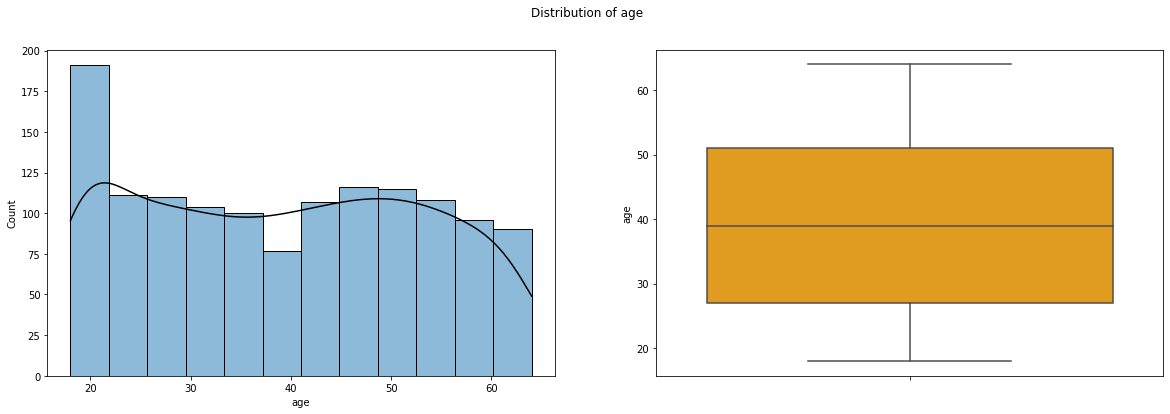

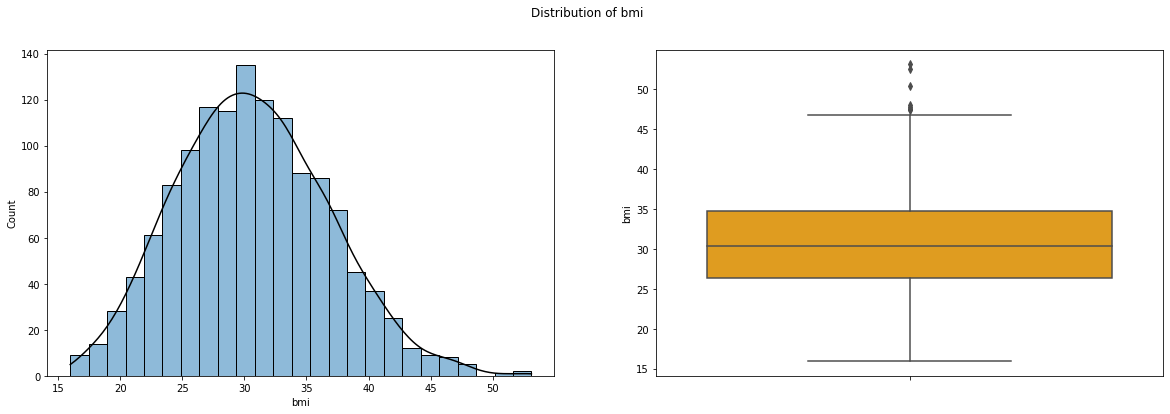

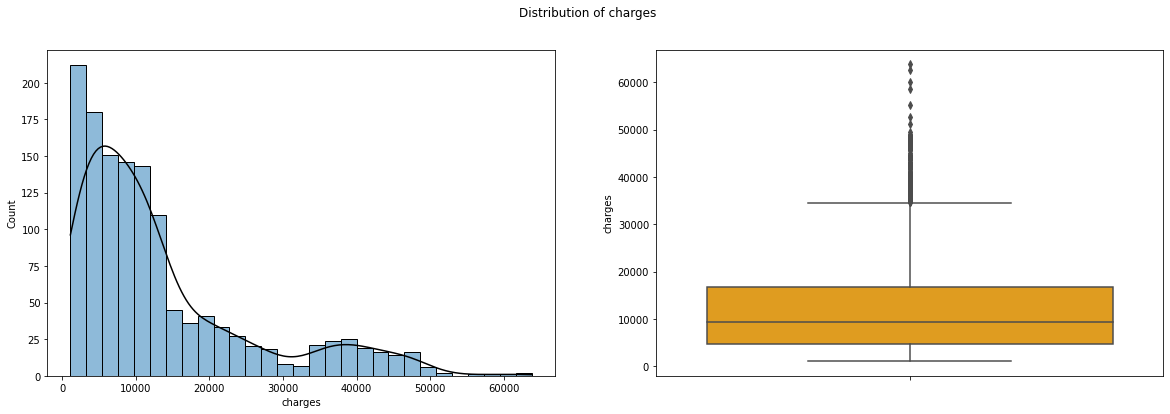

In [ ]:
hist_box(df,'age')
hist_box(df,'bmi')
hist_box(df,'charges')

- Number of customers almost stabilizes for all age group approximately after the age of 22.
- BMI is almost normally distributed with a light tail on the right which is reflected as outliers in the boxplot.
- Majority customers pay under 15000 premium although there significant customers paying high charges as well.

**Age, BMI and Charges Bi-Variate Analysis with respect to gender**

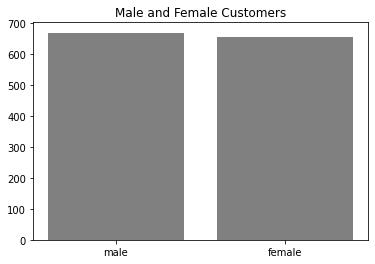

In [ ]:
plt.bar(df['sex'].value_counts().index,df['sex'].value_counts().values,color='gray')
plt.title('Male and Female Customers');

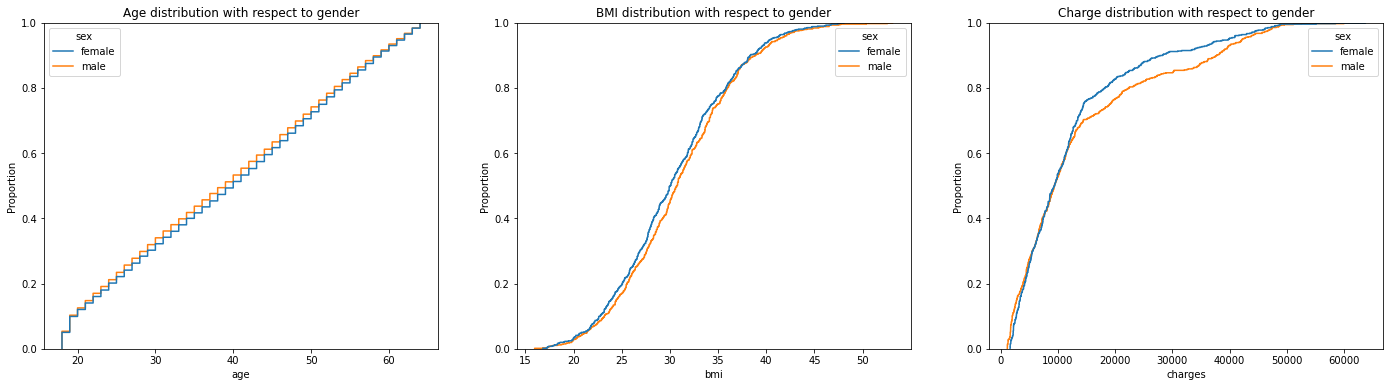

In [ ]:
plt.subplots(1,3,figsize=(24,6))
plt.subplot(1,3,1)
sns.ecdfplot(x=df['age'],hue=df['sex'])
plt.title('Age distribution with respect to gender')
plt.subplot(1,3,2)
sns.ecdfplot(x=df['bmi'],hue=df['sex'])
plt.title('BMI distribution with respect to gender')
plt.subplot(1,3,3)
sns.ecdfplot(x=df['charges'],hue=df['sex'])
plt.title('Charge distribution with respect to gender')
plt.show()

- There are almost equal number of male and female customers.
- There is no significant difference in the trend of age or bmi with respect the customer's sex.
- There is a slight change in the proportion of customers paying higher premium. More females appear to pay higher premium than male although the curve seems to move towards the same path.

**Age, BMI and Charges Bi-Variate Analysis with respect to classif**

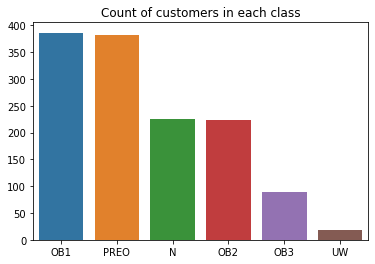

In [ ]:
sns.barplot(y=df['classif'].value_counts().values,x=df['classif'].value_counts().index)
plt.title('Count of customers in each class');

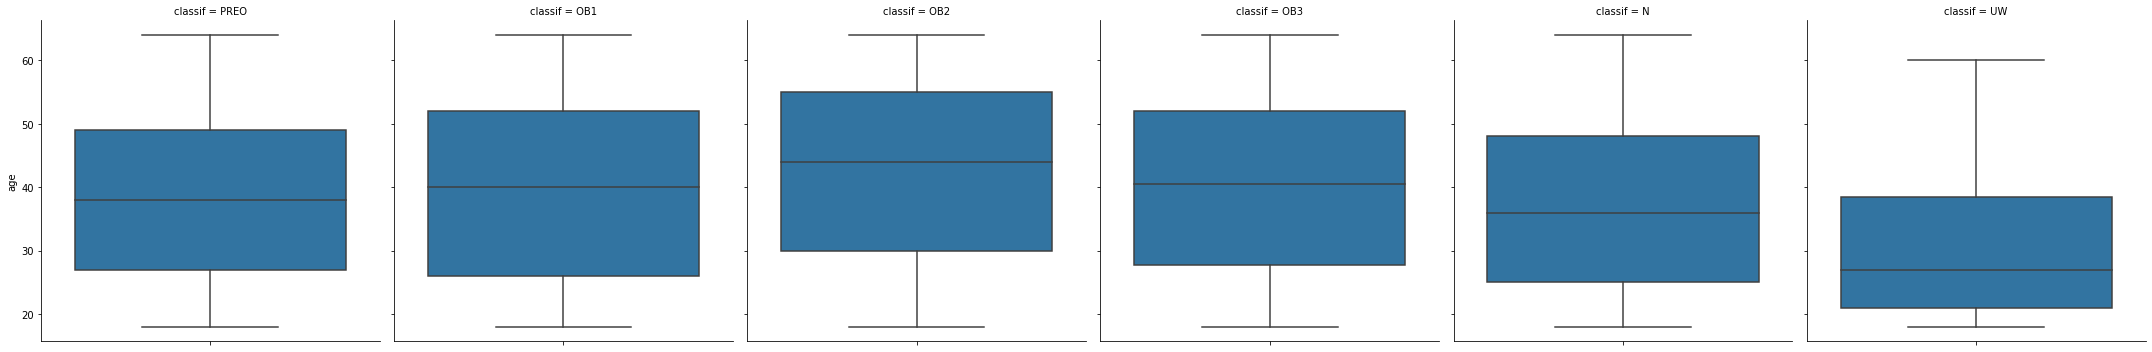

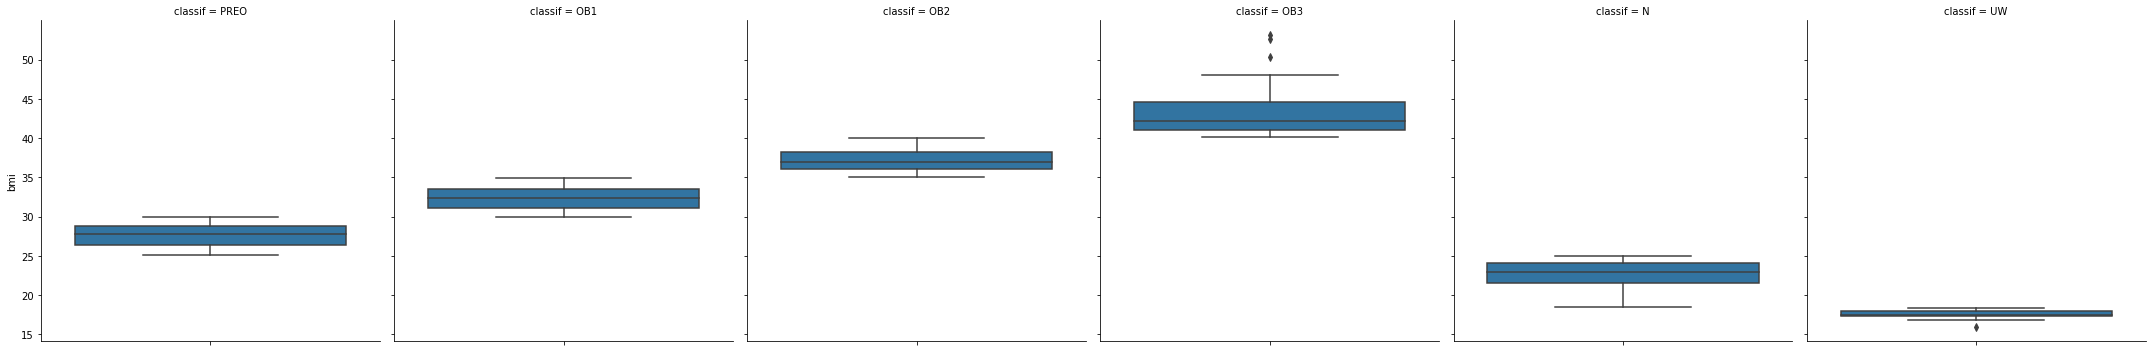

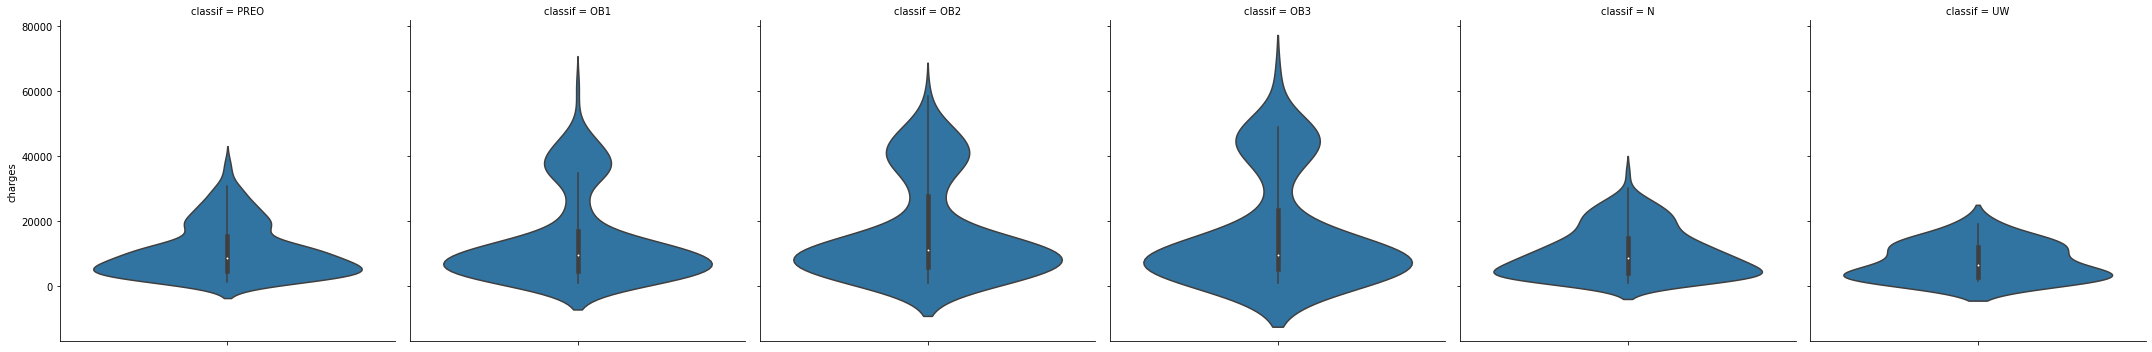

In [ ]:
sns.catplot(col='classif',y='age',kind='box',data=df)
sns.catplot(col='classif',y='bmi',kind='box',data=df)
sns.catplot(col='classif',y='charges',kind='violin',data=df);

- A huge number of customers are either pre-obese or obese1 and there is not much difference in their numbers.
- Every category have people from every age age group.
- Because the categorisation is done on the basis of their bmi, every category has a different distribution of bmi.
- People paying high premium belong to the categories of OB1, OB2, OB3 which makes sense as they are at higher risk.

**Age, BMI and Charges Bi-Variate Analysis with respect to smoking habit**

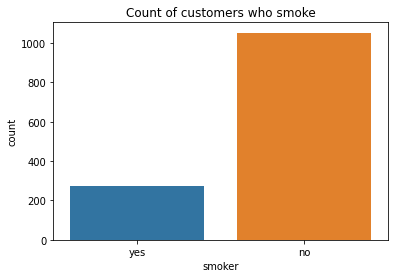

In [ ]:
sns.countplot(df['smoker'])
plt.title('Count of customers who smoke');

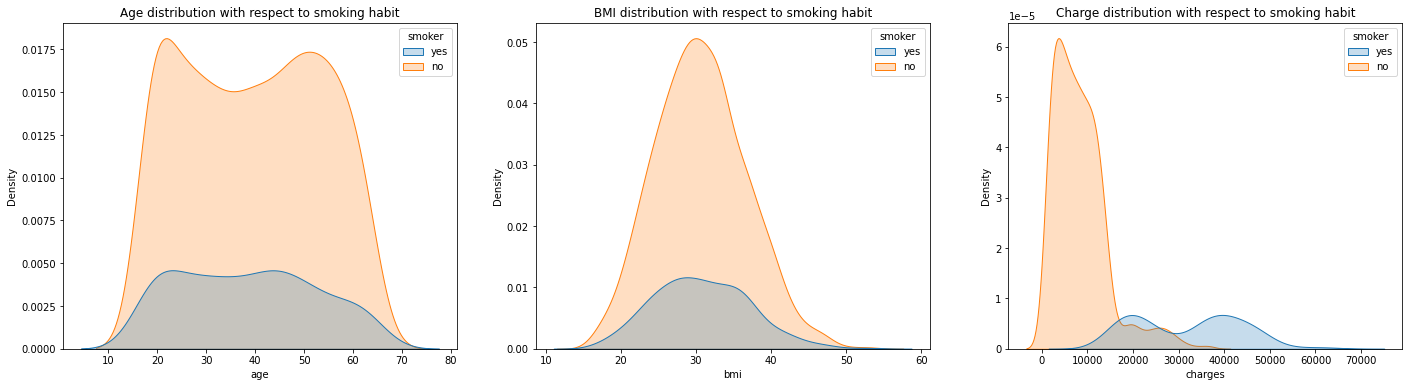

In [ ]:
plt.subplots(1,3,figsize=(24,6))
plt.subplot(1,3,1)
sns.kdeplot(x=df['age'],hue=df['smoker'],fill=True)
plt.title('Age distribution with respect to smoking habit')
plt.subplot(1,3,2)
sns.kdeplot(x=df['bmi'],hue=df['smoker'],fill=True)
plt.title('BMI distribution with respect to smoking habit')
plt.subplot(1,3,3)
sns.kdeplot(x=df['charges'],hue=df['smoker'],fill=True)
plt.title('Charge distribution with respect to smoking habit')
plt.show()

- Customers who smoke are very less compared to non-smokers.
- Customers who smoke are paying heavy premium while non-smokers majorly pay under 15000.

**Age, BMI and Charges Bi-Variate Analysis with respect to region**

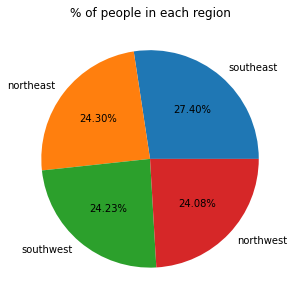

In [ ]:
plt.figure(figsize=(5,5))
plt.pie(df['region'].value_counts().values,autopct='%.2f%%',labels=df['region'].value_counts().index)
plt.title('% of people in each region');

In [ ]:
def hist_box_hue(data,col1,col2):
  plt.subplots(1,2,figsize=(20,6))
  plt.subplot(1,2,1)
  sns.histplot(x=data[col1],hue=data[col2],multiple='stack')
  plt.subplot(1,2,2)
  sns.violinplot(y=data[col1],x=data[col2])
  plt.suptitle(f'Distribution of {col1} with respect to {col2}')
  plt.show()

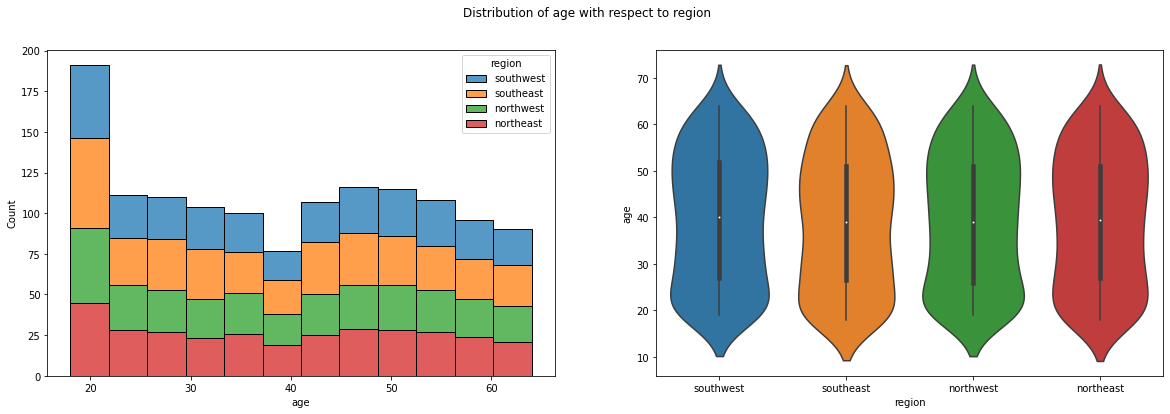

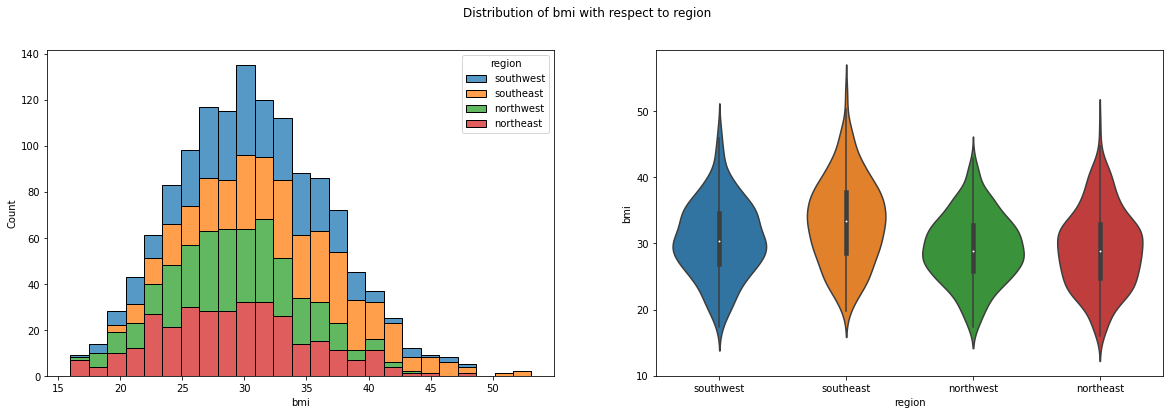

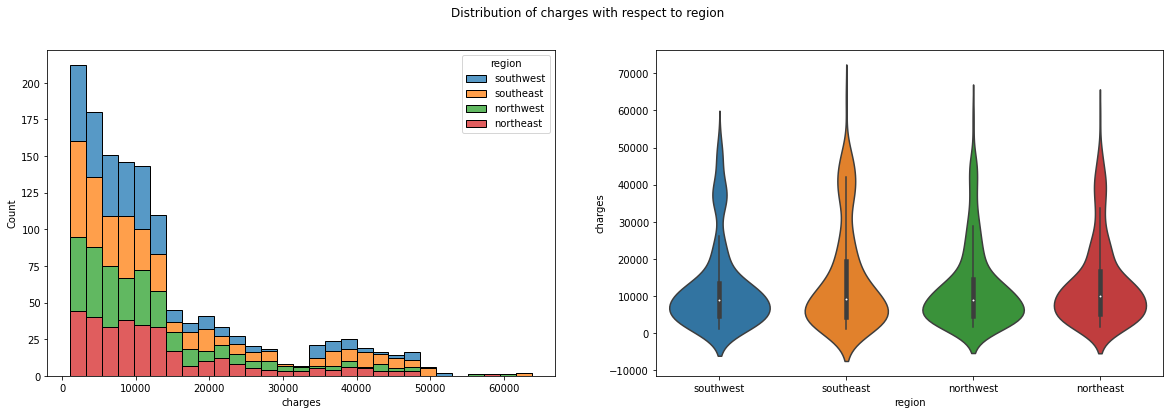

In [ ]:
hist_box_hue(df,'age','region')
hist_box_hue(df,'bmi','region')
hist_box_hue(df,'charges','region')

- Percentage of customers in each region are almost equally distributed except a little high in Southeast.
- The distribution of age, bmi, charges is not much different for different regions.
- There are few customers in every region paying high premium, maximum being in Southeast.

**Trend of Charges**

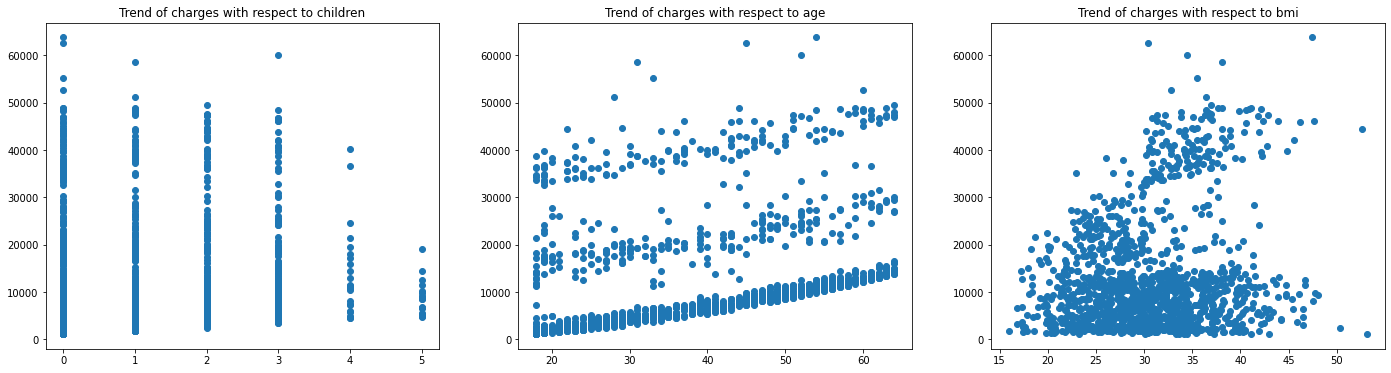

In [ ]:
plt.subplots(1,3,figsize=(24,6))
plt.subplot(1,3,1)
plt.scatter(x=df['children'],y=df['charges'])
plt.title('Trend of charges with respect to children')
plt.subplot(1,3,2)
plt.scatter(x=df['age'],y=df['charges'])
plt.title('Trend of charges with respect to age')
plt.subplot(1,3,3)
plt.scatter(x=df['bmi'],y=df['charges'])
plt.title('Trend of charges with respect to bmi')
plt.show()

- Age does not have much effect on charges.
- A few customers with four or five children are paying less premium.
- Customers with bmi less than 30 are not paying premium higher than 40000.

***From the above analysis it can be concluded that the most important features that have an impact on the premium charges are smoker and bmi.***


# Data Preparation

In [ ]:
columns=['age','bmi']
df[columns] = pr.MinMaxScaler().fit_transform(df[columns])
df.head()

,age,sex,bmi,classif,children,smoker,region,charges
0,0.02,female,0.32,PREO,0,yes,southwest,16884.92
1,0.00,male,0.48,OB1,1,no,southeast,1725.55
2,0.22,male,0.46,OB1,3,no,southeast,4449.46
4,0.30,male,0.35,PREO,0,no,northwest,3866.86
5,0.28,female,0.26,PREO,0,no,southeast,3756.62


In [ ]:
df=pd.get_dummies(df)
df.head()

,age,bmi,children,charges,sex_female,sex_male,classif_N,classif_OB1,classif_OB2,classif_OB3,classif_PREO,classif_UW,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,0.02,0.32,0,16884.92,1,0,0,0,0,0,1,0,0,1,0,0,0,1
1,0.00,0.48,1,1725.55,0,1,0,1,0,0,0,0,1,0,0,0,1,0
2,0.22,0.46,3,4449.46,0,1,0,1,0,0,0,0,1,0,0,0,1,0
4,0.30,0.35,0,3866.86,0,1,0,0,0,0,1,0,1,0,0,1,0,0
5,0.28,0.26,0,3756.62,1,0,0,0,0,0,1,0,1,0,0,0,1,0


Data has been scaled and labels have been encoded.

# Data Mining

## ML Models

**Data Split**

In [ ]:
X=df.drop('charges',axis=1)
y=df[['charges']]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

**Function to plot predictions**

In [ ]:
def plot_prediction(predict):
  plt.figure(figsize=(8,6))
  plt.scatter(X_test['age'][:50],y_test[:50],c='g',label='Testing')
  plt.scatter(X_test['age'][:50],predict[:50],c='r',label='Predictions')
  plt.legend();

### Linear Regression Model

Root Mean Squared Error of Test Data and Prediction :  6234.65190530565
Mean Absolute Error of Test Data and Prediction :  4443.314912554579
R^2 Score of Model for Test Dataset :  0.7284320207852746


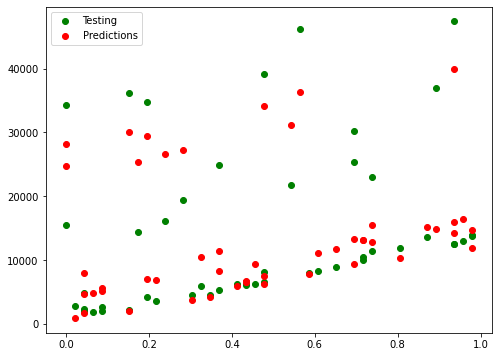

In [ ]:
linear=LinearRegression()
linear.fit(X_train,y_train)
pred_lin=linear.predict(X_test)
rmse_lin = np.sqrt(mean_squared_error(y_test,pred_lin))
mae_lin = mean_absolute_error(y_test,pred_lin)
rsc_lin=linear.score(X_test,y_test)
print('Root Mean Squared Error of Test Data and Prediction : ',rmse_lin)
print('Mean Absolute Error of Test Data and Prediction : ',mae_lin)
print('R^2 Score of Model for Test Dataset : ',rsc_lin)
plot_prediction(pred_lin)

### Ridge and Lasso Regression

Ridge

Root Mean Squared Error of Test Data and Prediction :  6234.689164936697
Mean Absolute Error of Test Data and Prediction :  4443.316620861129
R^2 Score of Model for Test Dataset :  0.7284287748773719


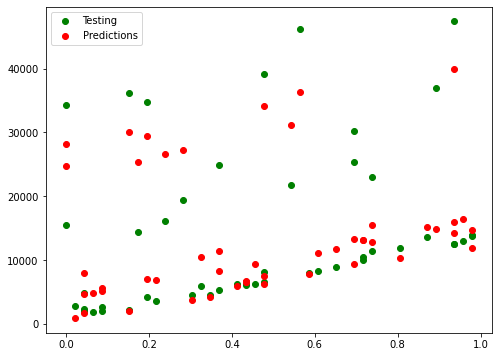

In [ ]:
ridge=Ridge(alpha=0.01) # After trying 0.1, 100, 0.001
ridge.fit(X_train,y_train)
pred_ridge=ridge.predict(X_test)
rmse_ridge = np.sqrt(mean_squared_error(y_test,pred_ridge))
mae_ridge = mean_absolute_error(y_test,pred_ridge)
rsc_ridge=ridge.score(X_test,y_test)
print('Root Mean Squared Error of Test Data and Prediction : ',rmse_ridge)
print('Mean Absolute Error of Test Data and Prediction : ',mae_ridge)
print('R^2 Score of Model for Test Dataset : ',rsc_ridge)
plot_prediction(pred_ridge)

Lasso

Root Mean Squared Error of Test Data and Prediction :  6234.607198461525
Mean Absolute Error of Test Data and Prediction :  4443.049539912537
R^2 Score of Model for Test Dataset :  0.7284359154385676


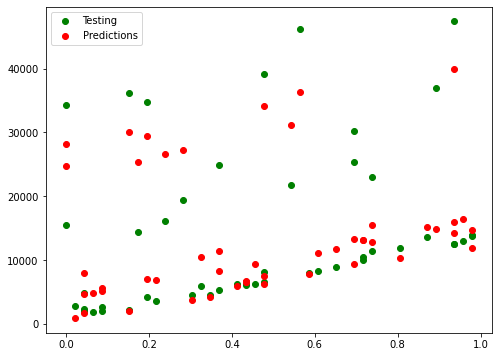

In [ ]:
lasso=Lasso(alpha=0.1) # After trying 0.01, 100, 0.001
lasso.fit(X_train,y_train)
pred_lasso=lasso.predict(X_test)
rmse_lasso = np.sqrt(mean_squared_error(y_test,pred_lasso))
mae_lasso = mean_absolute_error(y_test,pred_lasso)
rsc_lasso=lasso.score(X_test,y_test)
print('Root Mean Squared Error of Test Data and Prediction : ',rmse_lasso)
print('Mean Absolute Error of Test Data and Prediction : ',mae_lasso)
print('R^2 Score of Model for Test Dataset : ',rsc_lasso)
plot_prediction(pred_lasso)

### SVR

Root Mean Squared Error of Test Data and Prediction :  5873.684047700655
Mean Absolute Error of Test Data and Prediction :  2893.746567607022
R^2 Score of Model for Test Dataset :  0.7589676682490628


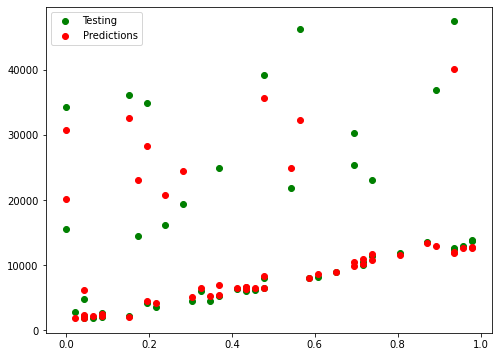

In [ ]:
svr=SVR(C=5000,gamma='auto') # After trying C=10,100,1000,2000
svr.fit(X_train,y_train)
pred_svr=svr.predict(X_test)
rmse_svr = np.sqrt(mean_squared_error(y_test,pred_svr))
mae_svr = mean_absolute_error(y_test,pred_svr)
rsc_svr=svr.score(X_test,y_test)
print('Root Mean Squared Error of Test Data and Prediction : ',rmse_svr)
print('Mean Absolute Error of Test Data and Prediction : ',mae_svr)
print('R^2 Score of Model for Test Dataset : ',rsc_svr)
plot_prediction(pred_svr)

### LinearSVR

Root Mean Squared Error of Test Data and Prediction :  6810.627282682986
Mean Absolute Error of Test Data and Prediction :  3346.932051465932
R^2 Score of Model for Test Dataset :  0.6759378070749119


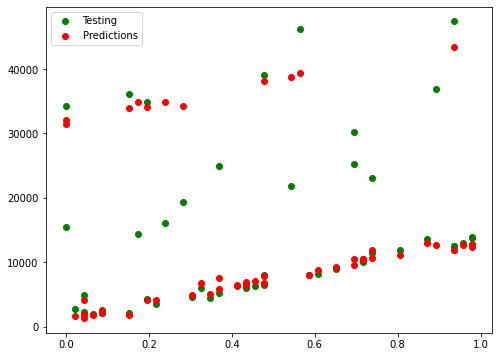

In [ ]:
lsvr=LinearSVR(C=5000,verbose=0,tol=0.001)
lsvr.fit(X_train,y_train)
pred_lsvr=lsvr.predict(X_test)
rmse_lsvr = np.sqrt(mean_squared_error(y_test,pred_lsvr))
mae_lsvr = mean_absolute_error(y_test,pred_lsvr)
rsc_lsvr=lsvr.score(X_test,y_test)
print('Root Mean Squared Error of Test Data and Prediction : ',rmse_lsvr)
print('Mean Absolute Error of Test Data and Prediction : ',mae_lsvr)
print('R^2 Score of Model for Test Dataset : ',rsc_lsvr)
plot_prediction(pred_lsvr)

### DecisionTreeRegressor

Root Mean Squared Error of Test Data and Prediction :  5018.092854063369
Mean Absolute Error of Test Data and Prediction :  2874.6903724611407
R^2 Score of Model for Test Dataset :  0.8240733936030518


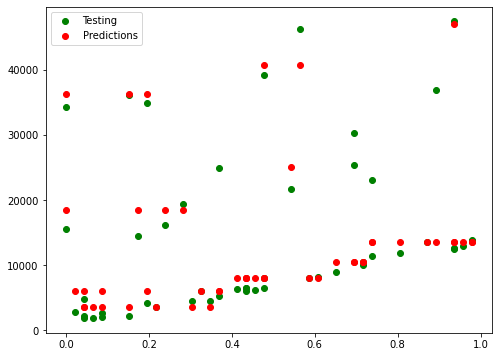

In [ ]:
dtr=DecisionTreeRegressor(max_depth=4,min_samples_split=5,max_leaf_nodes=10)
dtr.fit(X_train,y_train)
pred_dtr=dtr.predict(X_test)
rmse_dtr = np.sqrt(mean_squared_error(y_test,pred_dtr))
mae_dtr = mean_absolute_error(y_test,pred_dtr)
rsc_dtr=dtr.score(X_test,y_test)
print('Root Mean Squared Error of Test Data and Prediction : ',rmse_dtr)
print('Mean Absolute Error of Test Data and Prediction : ',mae_dtr)
print('R^2 Score of Model for Test Dataset : ',rsc_dtr)
plot_prediction(pred_dtr)

GridSearchCV

In [ ]:
model=DecisionTreeRegressor()
hyperparameters={'criterion':['mse','friedman_mse','mae'],'max_depth':[2,3,4,5,6,8]}
clf=GridSearchCV(model,hyperparameters,n_jobs=-1,cv=5)
clf.fit(X_train,y_train)
params=clf.best_params_
score=clf.best_score_
print('Best suited parameters for DecisionTreeRegressor model : ',params)
print('Best possible score for the model : ',score)

Best suited parameters for DecisionTreeRegressor model :  {'criterion': 'mae', 'max_depth': 4}
Best possible score for the model :  0.8619081321714759


Model using Best Parameters

Root Mean Squared Error of Test Data and Prediction :  5148.028052762458
Mean Absolute Error of Test Data and Prediction :  2358.6372306024095
R^2 Score of Model for Test Dataset :  0.8148447850650162


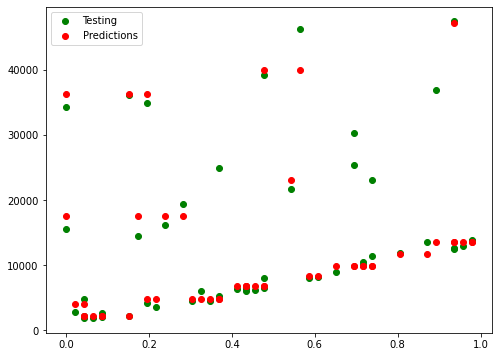

In [ ]:
dtr=DecisionTreeRegressor(criterion='mae',max_depth=4)
dtr.fit(X_train,y_train)
pred_dtr=dtr.predict(X_test)
rmse_dtr = np.sqrt(mean_squared_error(y_test,pred_dtr))
mae_dtr = mean_absolute_error(y_test,pred_dtr)
rsc_dtr=dtr.score(X_test,y_test)
print('Root Mean Squared Error of Test Data and Prediction : ',rmse_dtr)
print('Mean Absolute Error of Test Data and Prediction : ',mae_dtr)
print('R^2 Score of Model for Test Dataset : ',rsc_dtr)
plot_prediction(pred_dtr)

Cross Validation

In [ ]:
n_scores = cross_val_score(dtr, X, y, scoring='r2', cv=5, n_jobs=-1, error_score='raise')
print('Mean R^2 Score after cross validation : %.3f' % (np.mean(n_scores)))

Mean R^2 Score after cross validation : 0.846


### RandomForestRegressor

Root Mean Squared Error of Test Data and Prediction :  5117.525755066121
Mean Absolute Error of Test Data and Prediction :  2241.701039803313
R^2 Score of Model for Test Dataset :  0.817032390924993


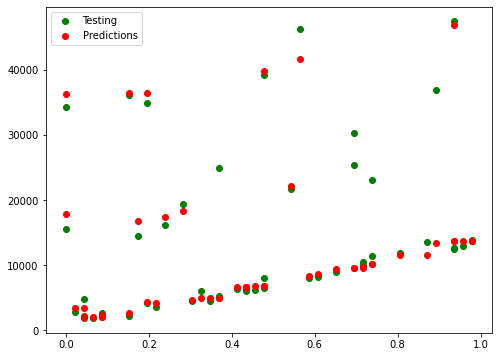

In [ ]:
rfr=RandomForestRegressor(criterion='mae',max_depth=4)
rfr.fit(X_train,y_train)
pred_rfr=rfr.predict(X_test)
rmse_rfr = np.sqrt(mean_squared_error(y_test,pred_rfr))
mae_rfr = mean_absolute_error(y_test,pred_rfr)
rsc_rfr=rfr.score(X_test,y_test)
print('Root Mean Squared Error of Test Data and Prediction : ',rmse_rfr)
print('Mean Absolute Error of Test Data and Prediction : ',mae_rfr)
print('R^2 Score of Model for Test Dataset : ',rsc_rfr)
plot_prediction(pred_rfr)

Cross Validation

In [ ]:
n_scores = cross_val_score(rfr, X, y, scoring='r2', cv=5, n_jobs=-1, error_score='raise')
print('Mean R^2 Score after cross validation : %.3f' % (np.mean(n_scores)))

Mean R^2 Score after cross validation : 0.851


### AdaBoostRegressor

Root Mean Squared Error of Test Data and Prediction :  5211.524294485901
Mean Absolute Error of Test Data and Prediction :  3823.0012489206806
R^2 Score of Model for Test Dataset :  0.8102491752446714


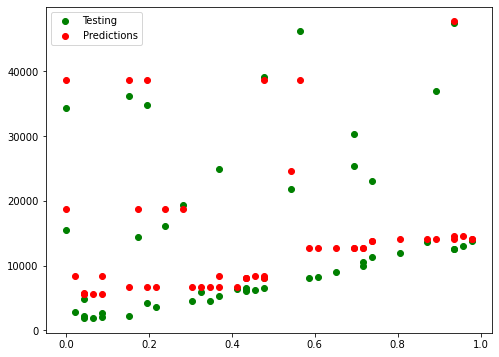

In [ ]:
abr=AdaBoostRegressor()
abr.fit(X_train,y_train)
pred_abr=abr.predict(X_test)
rmse_abr = np.sqrt(mean_squared_error(y_test,pred_abr))
mae_abr = mean_absolute_error(y_test,pred_abr)
rsc_abr=abr.score(X_test,y_test)
print('Root Mean Squared Error of Test Data and Prediction : ',rmse_abr)
print('Mean Absolute Error of Test Data and Prediction : ',mae_abr)
print('R^2 Score of Model for Test Dataset : ',rsc_abr)
plot_prediction(pred_abr)

Cross Validation

In [ ]:
n_scores = cross_val_score(abr, X, y, scoring='r2', cv=5, n_jobs=-1, error_score='raise')
print('Mean R^2 Score after cross validation : %.3f' % (np.mean(n_scores)))

Mean R^2 Score after cross validation : 0.820


***Compare the models***

In [ ]:
compare_ml = pd.DataFrame({'Model':['Linear','Ridge','Lasso','SVR','LinearSVR','DecisionTree','RandomForest','AdaBoost']
                           ,'RMSE':[rmse_lin,rmse_ridge,rmse_lasso,rmse_svr,rmse_lsvr,rmse_dtr,rmse_rfr,rmse_abr]
                           ,'MAE':[mae_lin,mae_ridge,mae_lasso,mae_svr,mae_lsvr,mae_dtr,mae_rfr,mae_abr]
                           ,'R^2 Score':[rsc_lin,rsc_ridge,rsc_lasso,rsc_svr,rsc_lsvr,rsc_dtr,rsc_rfr,rsc_abr]})

In [ ]:
compare_ml

,Model,RMSE,MAE,R^2 Score
0,Linear,6234.65,4443.31,0.73
1,Ridge,6234.69,4443.32,0.73
2,Lasso,6234.61,4443.05,0.73
3,SVR,5873.68,2893.75,0.76
4,LinearSVR,6810.63,3346.93,0.68
5,DecisionTree,5148.03,2358.64,0.81
6,RandomForest,5117.53,2241.70,0.82
7,AdaBoost,5211.52,3823.00,0.81


**RandomForestRegressor is the best ML model for our problem at hand.** 

### LazyRegressor

In [ ]:
lr=LazyRegressor(verbose=0,ignore_warnings=True,custom_metric=None)
models,predictions=lr.fit(X_train,X_test,y_train,y_test)

100%|██████████| 42/42 [00:05<00:00,  7.97it/s]


In [ ]:
models

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
GradientBoostingRegressor,0.83,0.84,4829.45,0.15
LGBMRegressor,0.80,0.81,5176.47,0.08
HistGradientBoostingRegressor,0.80,0.81,5189.40,0.73
AdaBoostRegressor,0.80,0.81,5196.74,0.03
RandomForestRegressor,0.80,0.81,5238.92,0.44
KNeighborsRegressor,0.79,0.80,5373.89,0.04
XGBRegressor,0.78,0.79,5447.75,0.18
ExtraTreesRegressor,0.77,0.79,5546.92,0.39
BaggingRegressor,0.77,0.78,5648.42,0.05


**LazyRegressor is used to compare all the possible different models without having to create the models ourselves.   
From our selected models AdaBoostRegressor and RandomForestRegressor have the same model score and are performing well.**

--------------------------------------------------------------------------------